In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data = pd.read_csv("dataset.csv")
data.head(10)


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,2,1,3,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
6,1,2,1,1,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
7,1,2,1,1,3,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
8,1,2,1,1,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
9,1,2,1,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


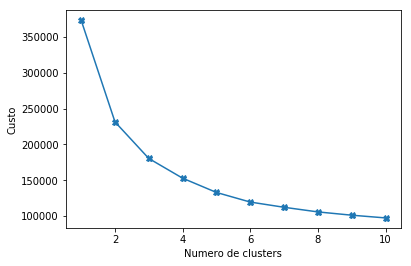

In [4]:
custo = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(data)
    custo.append((i, kmeans.inertia_))
    
plt.xlabel("Numero de clusters")
plt.ylabel("Custo")
plt.plot([w[0] for w in custo], [w[1] for w in custo], marker="X")

Text(0.5, 1.0, 'Gastos por cluster')

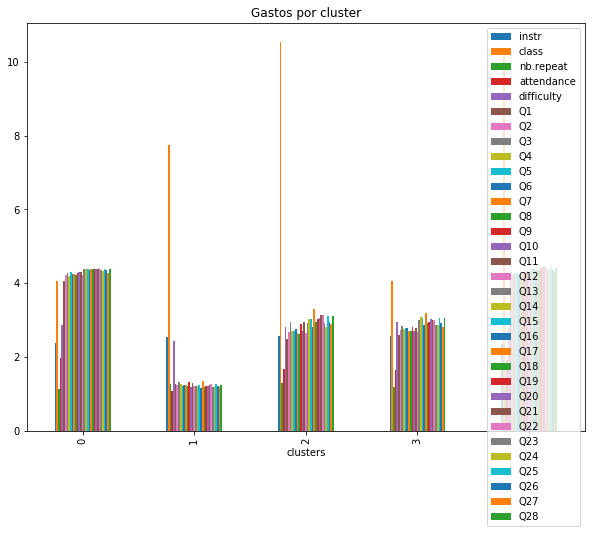

In [5]:
data_array = data.values

kmeans = KMeans(n_clusters=5, n_init=10, random_state=1234)
data["clusters"] = kmeans.fit_predict(data_array)

data.groupby("clusters").aggregate("mean").plot.bar(figsize=(10,7.5))
plt.title("Gastos por cluster")